In [22]:
import pandas as pd


In [23]:
df = pd.read_csv('monthly-beer-production.csv')
df.head()


,Date,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


<font color='red'>Question 2.1:</font> What is the type of **Date**?

In [6]:
df.Date.dtypes

dtype('O')

This means that the values in Date column are strings or a mixture of different types of objects.

<font color='red'>Assignment 2.1:</font> Use **pandas.to_datetime** to transform **df.Date** in to a series of datetime object and assign it to a new column **date**.

In [24]:
df['date'] = pd.to_datetime(df['Date'])

<font color='red'>Assignment 2.2:</font> What is the earliest date in the datetime series.

In [8]:
df.date.min()

Timestamp('1956-01-01 00:00:00')

<font color='red'>Assignment 2.3:</font> What is the latest date in the datetime series.

In [9]:
df.date.max()

Timestamp('1995-08-01 00:00:00')

**Example**: Visualize the time series of 'Monthly beer production'.

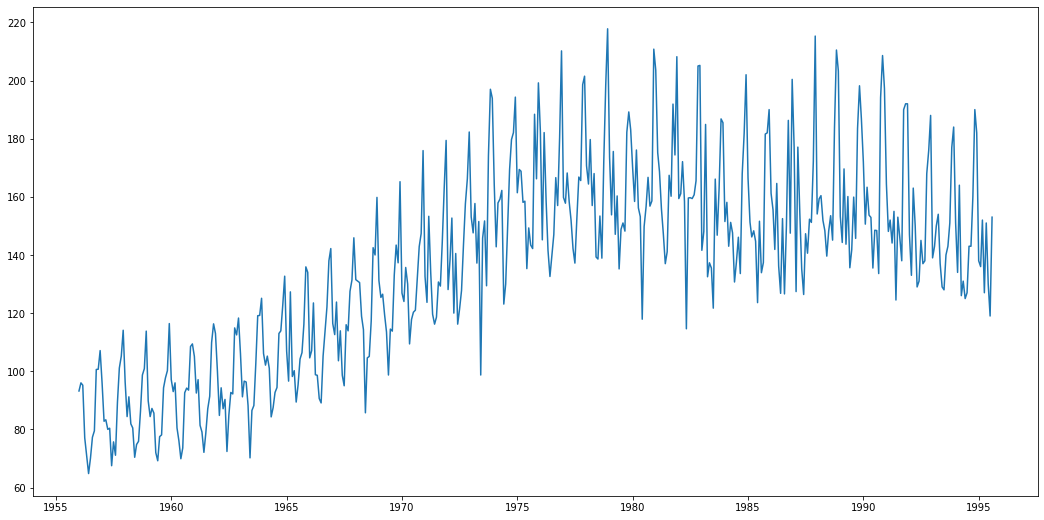

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df.set_index('date', drop=True, inplace=True)
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();


**Example**: Get yearly counts of data using **Resample**.


<AxesSubplot:title={'center':'Yearly Counts'}, xlabel='date'>

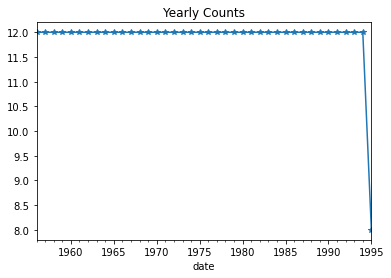

In [11]:
df['Monthly beer production'].resample('Y').count().plot(title='Yearly Counts', marker='*')


<font color='red'>Assignment 2.4:</font> Get yearly mean and median, respectively.


In [25]:
df.head(2)

,Date,Monthly beer production,date
0,1956-01-01,93.2,1956-01-01
1,1956-02-01,96.0,1956-02-01


In [16]:
df['Monthly beer production'].rolling(12).mean()[::12]

date
1956-01-01           NaN
1957-01-01     86.266667
1958-01-01     87.233333
1959-01-01     87.383333
1960-01-01     88.308333
1961-01-01     91.033333
1962-01-01     93.216667
1963-01-01     95.866667
1964-01-01     99.125000
1965-01-01    104.716667
1966-01-01    109.025000
1967-01-01    112.133333
1968-01-01    117.808333
1969-01-01    123.408333
1970-01-01    126.475000
1971-01-01    132.441667
1972-01-01    136.708333
1973-01-01    143.316667
1974-01-01    154.058333
1975-01-01    159.350000
1976-01-01    163.458333
1977-01-01    160.066667
1978-01-01    164.300000
1979-01-01    166.775000
1980-01-01    162.041667
1981-01-01    163.725000
1982-01-01    165.558333
1983-01-01    163.575000
1984-01-01    154.958333
1985-01-01    155.508333
1986-01-01    154.316667
1987-01-01    155.466667
1988-01-01    154.458333
1989-01-01    163.100000
1990-01-01    161.766667
1991-01-01    162.575000
1992-01-01    156.808333
1993-01-01    149.750000
1994-01-01    148.916667
1995-01-01    146.91

In [17]:
df['Monthly beer production'].rolling(12).median()[::12]

date
1956-01-01       NaN
1957-01-01     87.35
1958-01-01     83.05
1959-01-01     85.35
1960-01-01     86.40
1961-01-01     93.25
1962-01-01     91.95
1963-01-01     92.45
1964-01-01     96.45
1965-01-01    103.65
1966-01-01    104.40
1967-01-01    110.55
1968-01-01    114.95
1969-01-01    124.70
1970-01-01    125.95
1971-01-01    131.15
1972-01-01    130.00
1973-01-01    142.05
1974-01-01    151.60
1975-01-01    160.30
1976-01-01    162.35
1977-01-01    157.85
1978-01-01    162.00
1979-01-01    166.20
1980-01-01    157.05
1981-01-01    157.60
1982-01-01    163.80
1983-01-01    160.20
1984-01-01    149.80
1985-01-01    149.40
1986-01-01    149.80
1987-01-01    151.30
1988-01-01    151.75
1989-01-01    153.40
1990-01-01    160.00
1991-01-01    153.30
1992-01-01    150.05
1993-01-01    142.00
1994-01-01    146.50
1995-01-01    140.50
Name: Monthly beer production, dtype: float64

**Example:**</font> Get 12-month rolling moving average.

<AxesSubplot:title={'center':'12 Month Rolling Average'}, xlabel='date'>

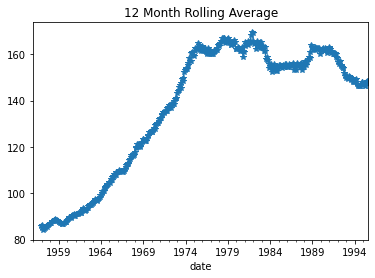

In [12]:
df['Monthly beer production'].rolling(12).mean().plot(title='12 Month Rolling Average', marker='*')

<font color='red'>Assignment 2.5:</font> Plot seasonal decomposition of monthly beer production.

In [19]:
df.head(2)

,Date,Monthly beer production
date,,
1956-01-01,1956-01-01,93.2
1956-02-01,1956-02-01,96.0


In [26]:
df.drop('Date', axis=1, inplace=True)


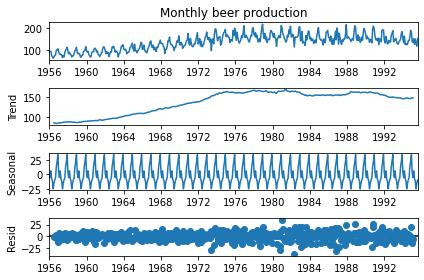

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index('date', inplace=True)

# apply seasonal decomposition to the monthly beer production column
decomposition = seasonal_decompose(df['Monthly beer production'], model='additive')

# plot the seasonal decomposition
decomposition.plot()
plt.show()


In [39]:
# split data into training data and test data
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

<font color='red'>Bonus Assignment 2.6:</font> use auto_arima to find the best (p, d, q) (P, D, Q) and forecast beer production for the last 12 months.

In [28]:
! pip install pmdarima

In [29]:
from pmdarima.arima import auto_arima

<AxesSubplot:xlabel='date'>

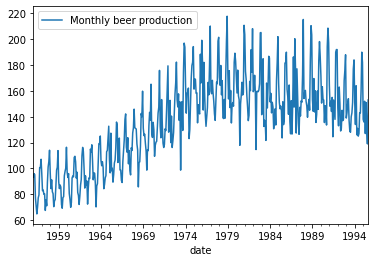

In [31]:
df.plot()
#to see patterns in data

In [32]:
from pmdarima.arima import ADFTest

In [33]:
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(df)

(0.01, False)

We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not which is available in the ‘pmdarima’ package.
From the above, we can conclude that the data is non-stationary. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

In [40]:
# Find best parameters
model = auto_arima(train_data['Monthly beer production'], seasonal=True, m=12, trace=True)

# Make forecasts
forecast = model.predict(n_periods=12)

print(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3468.501, Time=4.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4070.292, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3807.869, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3839.739, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4068.306, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3799.097, Time=0.60 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3523.820, Time=4.34 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=3467.473, Time=3.80 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=3715.554, Time=2.00 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=4.16 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=3529.063, Time=2.51 sec
 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=3470.137, Time=4.54 sec
 ARIMA(2,1,3)(1,0,2)[12] intercept

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  464
Model:             SARIMAX(3, 1, 4)x(1, 0, [1, 2], 12)   Log Likelihood               -1687.167
Date:                                 Mon, 13 Mar 2023   AIC                           3398.334
Time:                                         11:46:26   BIC                           3447.987
Sample:                                     01-01-1956   HQIC                          3417.881
                                          - 08-01-1994                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -7.39e-05      0.006     -0.013      0.990      -0.011       0.011
ar.L1         -0.3398      0.049     -6.896      0.000      -0.436      -0.243
ar.L2         -0.0607      0.057     -1.067      0.286      -0.172       0.051
ar.L3          0.8065      0.050     16.214      0.000       0.709       0.904
ma.L1         -0.7201      0.034    -20.932      0.000      -0.788      -0.653
ma.L2         -0.2003      0.021     -9.553      0.000      -0.241      -0.159
ma.L3         -0.8107      0.019    -41.978      0.000      -0.849      -0.773
ma.L4          0.8567      0.030     28.895      0.000       0.799       0.915
ar.S.L12       0.9906      0.006    166.780      0.000       0.979       1.002
ma.S.L12      -0.8174      0.047    -17.483      0.000      -0.909      -0.726
ma.S.L24       0.0515      0.045      1.133      0.257      -0.038       0.140
sigma2        77.4533      4.169     18.576      0.000      69.281      85.625
===================================================================================
Ljung-Box (L1) (Q):                   3.14   Jarque-Bera (JB):                65.72
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               3.31   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color='red'>Bonus Assignment 2.7:</font> visualize your forecast by plotting it together with the true values.

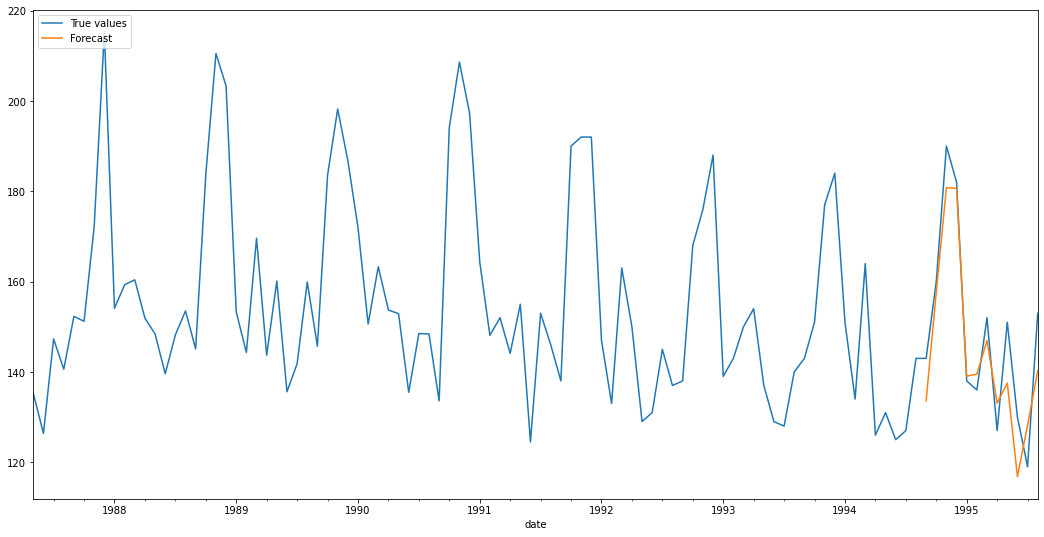

In [49]:
# plot the last 100 months only
plt.figure(figsize=(18,9))
df[-100:]['Monthly beer production'].plot(label="True values")
### add your code here
# plt.plot(forecast, label="Forecast")
forecast.plot(label="Forecast")
plt.legend(loc="upper left")
plt.show()

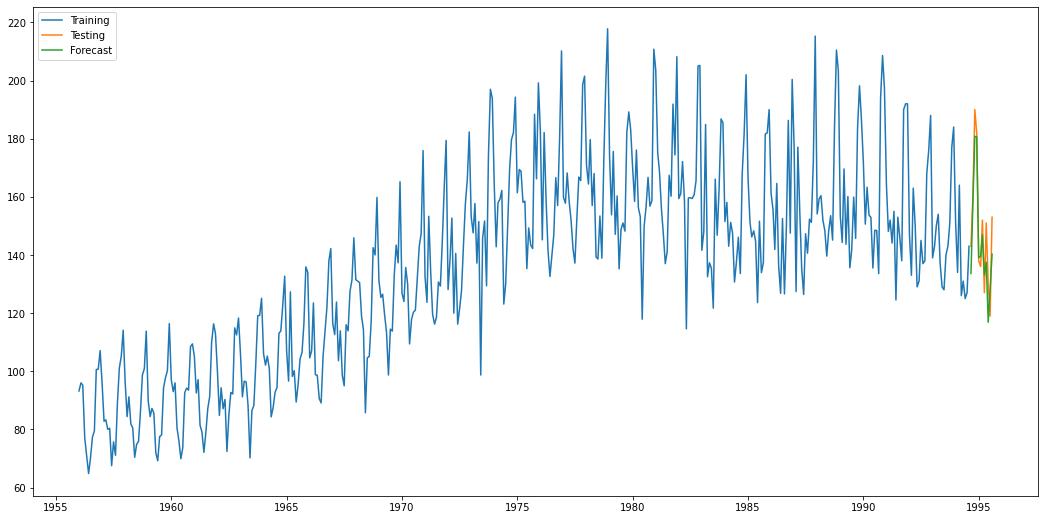

In [50]:
plt.figure(figsize=(18,9))
plt.plot(train_data, label="Training")
plt.plot(test_data, label="Testing")
plt.plot(forecast, label="Forecast")
plt.legend(loc="upper left")
plt.show()

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(test_data, forecast)

0.8277747272198777